Epoch 0/10000, Loss: 920.7517700195312
Epoch 1000/10000, Loss: 3.7403337955474854
Epoch 2000/10000, Loss: 3.1208713054656982
Epoch 3000/10000, Loss: 2.073551893234253
Epoch 4000/10000, Loss: 1.3758089542388916
Epoch 5000/10000, Loss: 0.5685502886772156
Epoch 6000/10000, Loss: 33.861183166503906
Epoch 7000/10000, Loss: 5.765289306640625
Epoch 8000/10000, Loss: 2.9240610599517822
Epoch 9000/10000, Loss: 2.588418483734131


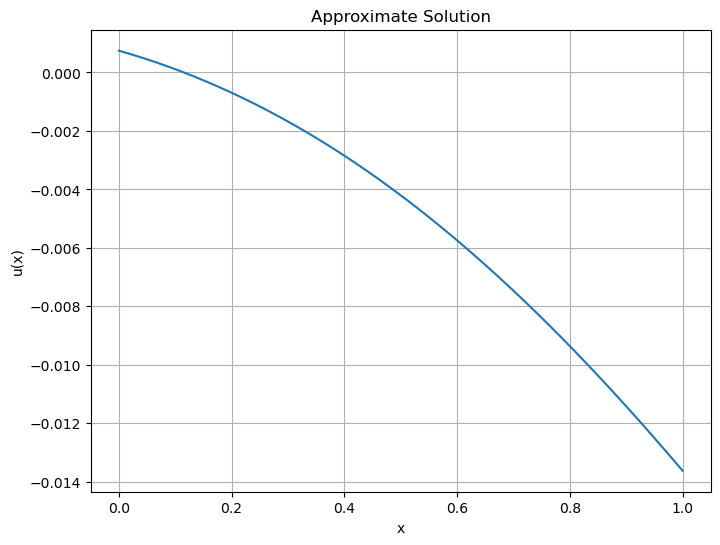

In [3]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from scipy.integrate import quad


class DeepRitzNet(nn.Module):
    def __init__(self):
        super(DeepRitzNet, self).__init__()
        self.layer1 = nn.Linear(1, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 20)
        self.layer4 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = torch.tanh(self.layer3(x))
        x = self.layer4(x)
        return x

def energy_functional(u, x, g):
    u_prime = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True, retain_graph=True)[0]
    energy = 0.5 * torch.sum(u_prime*u_prime) - torch.sum(g * u)
    
    
    u_0 = u[0]
    u_1 = u[-1]
    energy += (10**5) * (torch.square(u[0]) + torch.max(u[-1], torch.zeros_like(u[-1])) + torch.square(torch.max(u[-1], torch.zeros_like(u[-1]))) + torch.square(torch.max(u_prime[-1], torch.zeros_like(u_prime[-1]))) + torch.square(u_prime[-1] * (u[-1])))[0]
    return torch.mean(energy)



def train(model, x, g, epochs=10000, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        u = model(x)
        u.requires_grad_(True)
        energy = energy_functional(u, x, g)
        loss = energy  # We maximize the energy functional, equivalent to minimizing its negation
        loss.backward(retain_graph=True)
        optimizer.step()

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

def main():
    x = torch.linspace(0, 1, 500).reshape(-1, 1)
    x.requires_grad_(True)

    g = x*x #change value of g here to figure out the approximate solution

    model = DeepRitzNet()

    train(model, x, g)

    u_approx = model(x)

    x_np = x.detach().numpy()
    u_approx_np = u_approx.detach().numpy()

    plt.figure(figsize=(8, 6))
    plt.plot(x_np, u_approx_np)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Approximate Solution')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


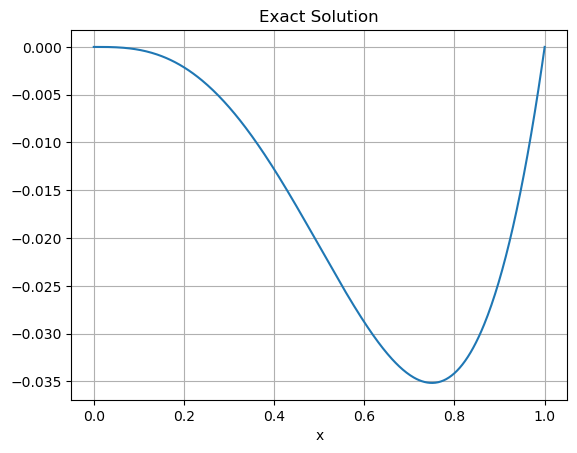

In [14]:
def g(x):
    return x**2  

def u_case_1(x):
    integrals = np.zeros_like(x)
    for i, xi in enumerate(x):
        integrals[i], _ = quad(lambda x: quad(g, 0, x)[0], 0, xi)
    return -integrals + integrals * x

def u_case_2(x):
    integrals = np.zeros_like(x)
    for i, xi in enumerate(x):
        integrals[i], _ = quad(g, 0, xi)
    return -integrals + integrals * x

def func(x,g):
    if g>=0:
        return -(g/2)*(x**2) + (g/2)*(x) 
    else:
        return -(g/2)*(x**2) + g*(x)

x = np.linspace(0, 1, 500)
#y = func(x,-2) #change value of g here to figure out the exact solution
y = u_case_2(x)
plt.plot(x, y)
plt.xlabel('x')
plt.title('Exact Solution')
plt.grid(True)
plt.show()

In [5]:
x = torch.linspace(0, 1, 500).reshape(-1, 1)
x.shape

torch.Size([500, 1])

In [7]:
(x*x).shape

torch.Size([500, 1])

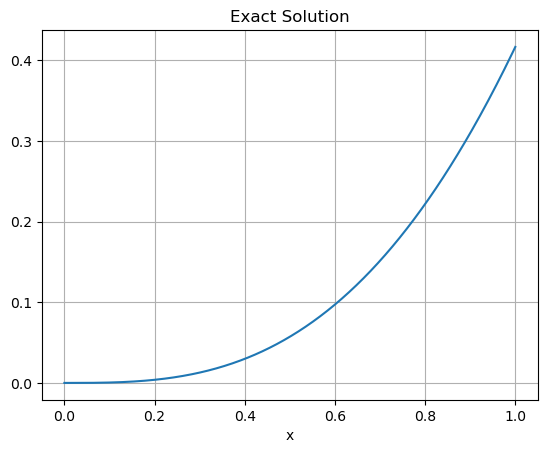

In [15]:
def f(x):
    return (-1/12)*(x**4)+0.5*(x**3)

x = np.linspace(0, 1, 500)
#y = func(x,-2) #change value of g here to figure out the exact solution
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.title('Exact Solution')
plt.grid(True)
plt.show()